In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [3]:
def gradient_descent(derivative_func , initial_guess , multiplier = 0.02 , precision = 0.001 , max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    
    slope_list = [derivative_func(new_x)]
    
    for i in range(max_iter):
        previous_x = new_x
        
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
        
    return new_x , x_list , slope_list

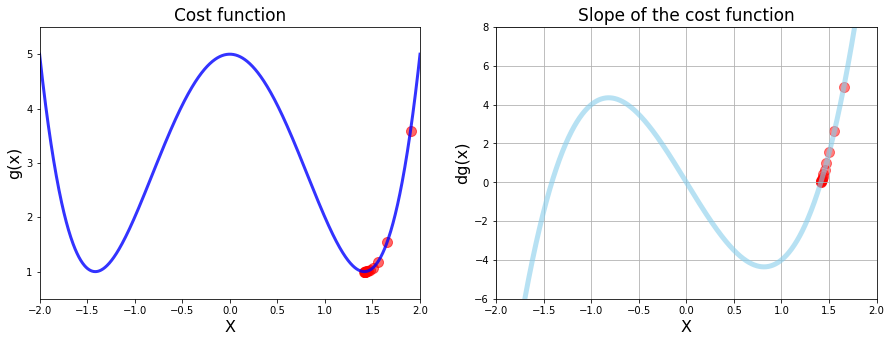

Number of steps is:  14


In [4]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

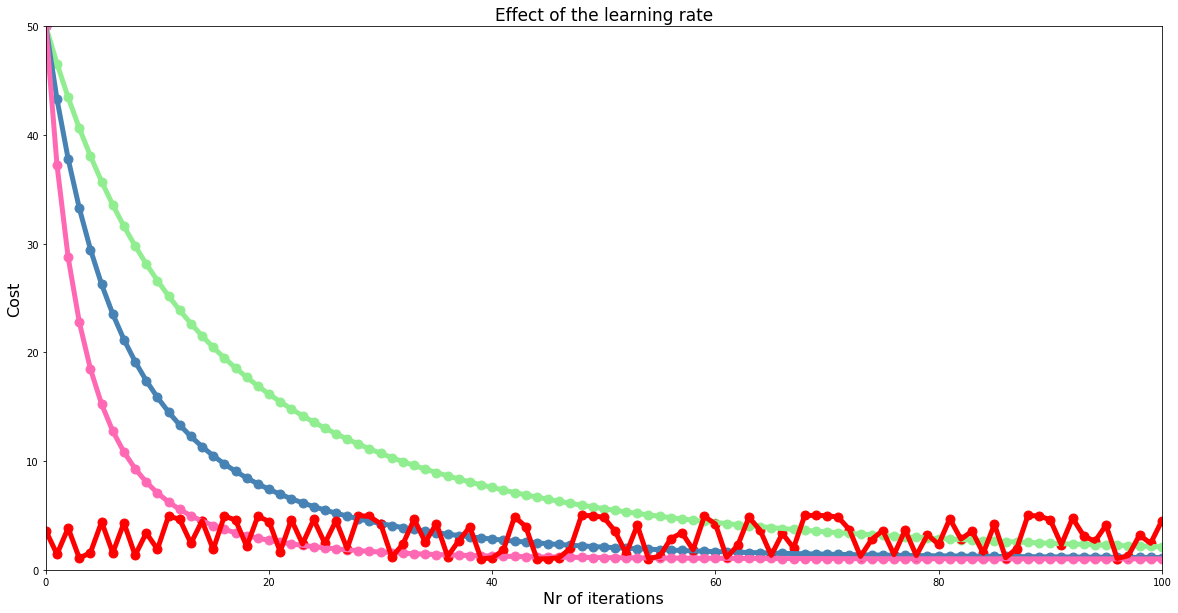

In [5]:
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter = n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter = n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter = n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter = n)


plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

low_values = np.array(low_gamma[1])

iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()